In [1]:
import os
os.getcwd()

'C:\\Users\\Maria\\Documents'

In [2]:
import numpy as np
import pandas as pd

In [3]:
with open('amazon-meta.txt') as ama_meta:
    line_nb = 0
    ratings = []
    votess = []
    helpfuls = []
    ranges = []
    stds = []
    title = ''
    for line in ama_meta:
        
        if line.find('title') != -1:
            if title != '':
                if len(ratings) == 0:
                    range_ = 0
                else:
                    range_ = max(ratings) - min(ratings)
                std_ = np.std(ratings)
                #print title, range_, std_
                ranges.append(range_)
                stds.append(std_)
            title = line.replace('title: ','')[:-1]
            
            ratings = []
            votess = []
            helpfuls = []
            
        if line.find('group') != -1:
            group = line.split()[-1]
            #print group
            if group != 'Book':
                continue
            #else:
            #    print title, ratings, votess, helpfuls
        if line.find(' rating:') != -1:
            line_lst = line.split()
            if len(line_lst) == 9:
                #print line_lst
                rating = int(line_lst[4])
                votes = int(line_lst[6])
                helpful = int(line_lst[8])
                ratings.append(rating)
                votess.append(votes)
                helpfuls.append(helpful)
                #print ratings, votess, helpfuls
                
            line_nb+=1
    s_range = pd.Series(ranges)
    s_std = pd.Series(stds)

C:\Users\Maria\Anaconda2\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\Maria\Anaconda2\lib\site-packages\numpy\core\_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Maria\Anaconda2\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
import matplotlib
%matplotlib inline

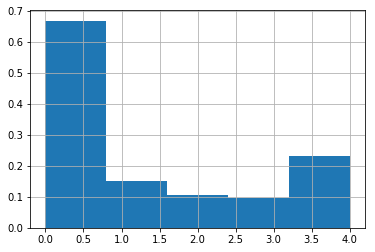

In [5]:
s_range.hist(bins = 5, normed=True)

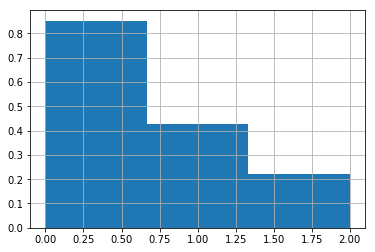

In [6]:
s_std.hist(bins=3, normed=True)

### What can we say about the ratings in the dataset?

In the above histograms we plot the distributions of range and std deviation of the ratings. We see that for about 68% of the items the ratings are limited to a range of one, which means that they are very consistent for most of the items.
However, for about 23% of the items, we do see high ranges of 4.

When we look at the standard deviation of ratings, we see that for most i.e. 90% of the ratings, the standard deviation is less than 0.5 and for about 20% of the items, it is in the range of 1.5 to 2.0. This also implies that the high range of 4 for 20% of the items is because of the outliers not the bulk of the ratings. 

Our conclusion is that on average the ratings are a reliable measure of product quality.

### What can we say about the ratings in the dataset?

In the above histograms we plot the distributions of range and std deviation of the ratings. We see that for about 68% of the items the ratings are limited to a range of one, which means that they are very consistent for most of the items.
However, for about 23% of the items, we do see high ranges of 4.

When we look at the standard deviation of ratings, we see that for most i.e. 90% of the ratings, the standard deviation is less than 0.5 and for about 20% of the items, it is in the range of 1.5 to 2.0. This also implies that the high range of 4 for 20% of the items (mentioned in the previous paragraph) is because of the outliers not the bulk of the ratings; otherwise, we'd have seen a similar distribution for the standard deviation.

Our conclusion is that on average the ratings are a reliable measure of product quality.

In [22]:
with open('amazon-meta.txt') as ama_meta:
    line_nb = 0
    categories = []
    for line in ama_meta:
        if line.find('Books[') != -1:
            line_lst = line.split('|')
            for cat in line_lst:
                cat_id_str = cat.split('[')[-1].strip()
                cat_id_str = cat_id_str.replace(']','')
                if cat_id_str != '':
                    cat_id = int(cat_id_str)
                    categories.append(cat_id)
categories.sort()                 

In [45]:
i = 0
tups = []
while i < len(categories):
    j = i
    while categories[j] == categories[i]:
        j+=1
        if j==len(categories):
            break
    tups.append((categories[i], j-i))
    i = j

tups.sort(key=lambda x: x[1], reverse=True)
print tups[:100]

[(283155, 1287060), (1000, 1222836), (4, 134299), (265523, 122154), (285080, 122154), (53, 106977), (22, 93690), (764512, 90413), (17, 84721), (767740, 76458), (3, 74125), (173507, 67693), (5, 66742), (10, 66380), (21, 50115), (9, 48131), (12290, 41872), (75, 41727), (2, 40075), (48, 39598), (1, 36472), (86, 34815), (504358, 34524), (11232, 31391), (605012, 31292), (3074321, 31292), (639538, 31251), (18, 29706), (27, 28400), (13996, 27615), (504360, 27508), (10605, 23721), (10125, 23401), (2966, 23163), (25, 22051), (173514, 21705), (44, 21190), (173510, 21131), (3020, 20509), (26, 20255), (13643, 19461), (767880, 18439), (2612, 18437), (11119, 18111), (6, 18103), (10311, 17210), (11079, 15809), (2785, 15701), (465600, 15230), (4507, 15186), (23, 14994), (11288, 14247), (768162, 13955), (408268, 13703), (11019, 13647), (5126, 13494), (3839, 13358), (520998, 13054), (4808, 13039), (20, 12669), (12809, 12504), (2375, 12243), (4736, 11946), (11289, 11779), (173508, 11475), (10129, 11448),

In [39]:
len(tups)

14400

In [40]:
0.1 * len(tups)

1440.0

In [41]:
# let's remove 10% most frequent categories
tups_trunc = tups[1441:]

In [44]:
num_cat = sum(cat_freq)
num_cat_trunc = sum(map(lambda x: x[1], tups_trunc))

print 'original category entries =', num_cat
print 'category entries after removing 10% categories =', num_cat_trunc
print 'ratio of new to old category entries =', num_cat_trunc * 1.0 / num_cat * 100, '%'

original category entries = 7876554
category entries after removing 10% categories = 760594
ratio of new to old category entries = 9.65643097222 %


### Is there redundancy in the categorization?

There is a lot of redundancy in the categorization and by removing the top 10% most frequent categories we can reduce the total number of category entries to 10% of the original category entries.

### How would build the product categorization from scratch, using similar/co-purchased information? 

I think that agglomerative clustering can help in building the categorization hierarchy for the products. Once such hierarchy has been generated, its various levels may be appropriately named by human workers.

### Product thinking
a. Is it a good idea to show users the categorization hierarchy for items?
Yes, this gives the users a browse feature using which they can explore similar items in the online catalogue.

b. Is it a good idea to show users similar/co-purchased items?
Yes, it is a good idea because users may like to buy another similar item instead that suits them better or has better reviews or ratings.

c. Is it a good idea to show users reviews and ratings for items?
Yes, this will help the users make informed decisions about their purchases.

d. For each of the above, why? How will you establish the same?
I think the first two can be established either by doing a controlled experiment and seeing whether the sales increased after these features were implemented. A more detailed study can be done by studying the exploration graph of individual users and the average path length along these graphs where they made the purchase. 

For establishing c, we can design a controlled experiment to measure the boost/decline in the sales after good/bad reviews have been entered. This can be done by A/B testing, where one version of the website has the reviews and the other doesn't.